<center><h2>EqHeatAnimate</h2></center>

""" From "COMPUTATIONAL PHYSICS" & "COMPUTER PROBLEMS in PHYSICS"
    by RH Landau, MJ Paez, and CC Bordeianu (deceased).
    Copyright R Landau, Oregon State Unv, MJ Paez, Univ Antioquia, 
    C Bordeianu, Univ Bucharest, 2020. 
    Please respect copyright & acknowledge our work."""
    
<p>
EeHeatAnimate.py: animation of heat equation solution

In [2]:
% matplotlib notebook

from numpy import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Parameters
Nx = 101                                                           # Grid points in x
Dx = 0.01414                                                            # x increment
Dt = 0.6                                                                # t increment
KAPPA = 210.                                                   # Thermal conductivity
SPH = 900.                                                            # Specific heat
RHO = 2700.                                                                 # Density
cons = KAPPA/(SPH*RHO)*Dt/(Dx*Dx)# Constant combo in algorthim                                 # Temp @ first 2 times
T = np.zeros( (Nx,2), float)  

In [3]:
def initio():
   T[1:Nx-1,0] = 100.0;       # Initial temperature
   T[0,0] = 0.0                                               # Ends of bar at T = 0
   T[0,1] = 0.                          
   T[Nx - 1,0] = 0.
   T[Nx - 1,1] = 0.0

<IPython.core.display.Javascript object>


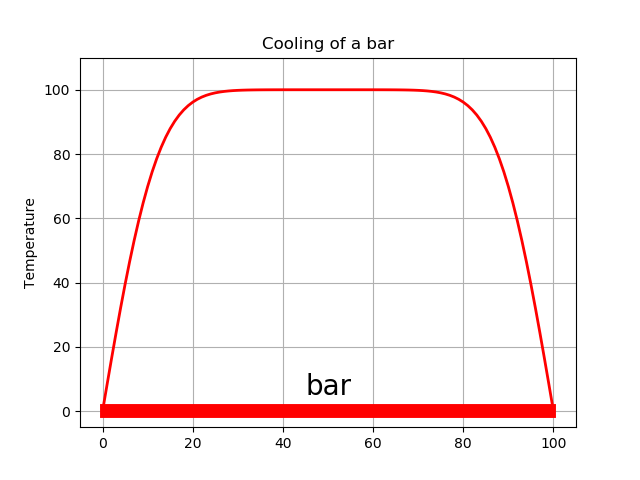

In [4]:
initio()
k = arange(101)
fig = plt.figure()  # 111: only one plot, x,y 
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-5, 105), ylim=(-5, 110.0))
ax.grid()                                        # plot a grid
plt.ylabel("Temperature")                        # temperature  
plt.title("Cooling of a bar")
line, = ax.plot(k, T[:101,0],"r", lw=2)             # x axis, y values, linewidth=2
plt.plot([1,99],[0,0],"r",lw=10)                     
plt.text(45,5,'bar',fontsize=20)                      

def animate(dum): # later time steps
   print("hola")
   for ix in range (1, Nx - 1):                     # Finite differences
      T[ix,1] = T[ix,0] +  cons*(T[ix + 1,0] + T[ix - 1,0] - 2.0*T[ix,0])
   line.set_data(k,T[:Nx,1] )    # data to plot (x,y)=(k,temperature) 
   for ix in range (1, Nx - 1):
     T[ix, 0] = T[ix, 1]                           # Row of 100 positions at t = m
   return line,              
ani = animation.FuncAnimation(fig, animate,1,blit=True)
plt.show()